# Essai apprentissage - 1 couche

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten, Lambda, Reshape, Permute
from keras.layers.convolutional import Convolution1D, Convolution2D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,Adadelta,RMSprop
from keras.constraints import max_norm

# Training du CNN sur le patient 1

In [2]:
x,y = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(1)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(1)+'_y_4hours.npy')
train_images, train_labels,test_images, test_labels = np.expand_dims(x[19075:],-1),to_categorical(y[19075:]),np.expand_dims(x[:19075],-1),to_categorical(y[:19075])

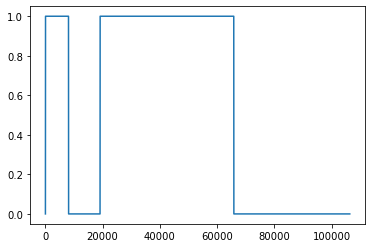

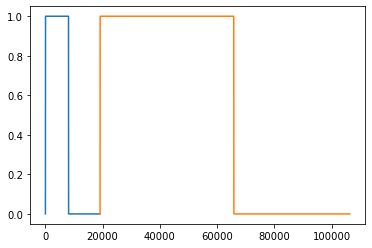

In [3]:
plt.plot(np.arange(0,len(y)),y)
plt.show()
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1])
plt.show()


In [4]:
shuffled_index_train =np.arange(0,len(train_labels))
np.random.shuffle(shuffled_index_train)
train_images, train_labels = train_images[shuffled_index_train,:,:,:],train_labels[shuffled_index_train,:]

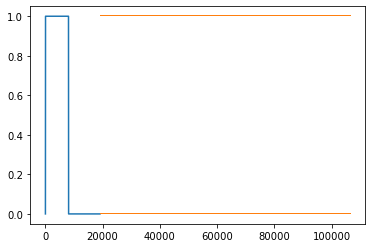

In [5]:
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1],',')
plt.show()

In [6]:
train_images.shape

(87273, 129, 15, 1)

In [10]:
model = models.Sequential()

#model.add(layers.Input(train_images.shape[1:]))
model.add(layers.BatchNormalization(axis=1, name='normal1'))
model.add(layers.Convolution2D(1,(15,5),activation = 'relu',padding='valid', strides=(1,2),name='conv1'))
model.add(layers.MaxPooling2D(pool_size=(3,2)))

#model.add(layers.BatchNormalization(axis=1, name='normal2'))
#model.add(layers.Convolution2D(2,(1,3),activation = 'relu',padding='valid', strides=(1,2),name='conv2'))
#model.add(layers.MaxPooling2D(pool_size=(2,1)))

#model.add(layers.BatchNormalization(axis=1, name='normal3'))
#model.add(layers.Convolution2D(64,(1,3),activation = 'relu',padding='valid', strides=(1,1),name='conv3'))
#model.add(layers.MaxPooling2D(pool_size=(2,1)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='softmax',name='dens2'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2, activation='softmax',name='dens2'))


model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','AUC'])
model.evaluate(test_images,  test_labels, verbose=2)


597/597 - 2s - loss: 0.6948 - accuracy: 0.5216 - auc: 0.4587 - 2s/epoch - 4ms/step


[0.6947842240333557, 0.5215727686882019, 0.4586995244026184]

In [11]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normal1 (BatchNormalization  (None, 129, 15, 1)       516       
 )                                                               
                                                                 
 conv1 (Conv2D)              (None, 115, 6, 1)         76        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 38, 3, 1)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 114)               0         
                                                                 
 dropout_3 (Dropout)         (None, 114)               0         
                                                                 
 dens2 (Dense)               (None, 2)                

In [12]:


history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
2728/2728 [==============================] - 16s 6ms/step - loss: 0.1058 - accuracy: 0.9587 - auc: 0.9931 - val_loss: 0.4398 - val_accuracy: 0.8299 - val_auc: 0.9246
Epoch 2/10
2728/2728 [==============================] - 15s 6ms/step - loss: 0.0444 - accuracy: 0.9846 - auc: 0.9984 - val_loss: 0.7015 - val_accuracy: 0.7605 - val_auc: 0.8668
Epoch 3/10
2728/2728 [==============================] - 15s 5ms/step - loss: 0.0345 - accuracy: 0.9889 - auc: 0.9988 - val_loss: 0.7787 - val_accuracy: 0.7611 - val_auc: 0.8641
Epoch 4/10
2728/2728 [==============================] - 14s 5ms/step - loss: 0.0301 - accuracy: 0.9896 - auc: 0.9992 - val_loss: 0.6804 - val_accuracy: 0.7856 - val_auc: 0.8855
Epoch 5/10
2728/2728 [==============================] - 15s 5ms/step - loss: 0.0263 - accuracy: 0.9915 - auc: 0.9992 - val_loss: 0.6669 - val_accuracy: 0.7861 - val_auc: 0.8861
Epoch 6/10
2728/2728 [==============================] - 15s 5ms/step - loss: 0.0233 - accuracy: 0.9928 - auc: 0.999

In [13]:

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
2728/2728 [==============================] - 16s 6ms/step - loss: 0.0146 - accuracy: 0.9957 - auc: 0.9996 - val_loss: 0.8026 - val_accuracy: 0.7658 - val_auc: 0.8692
Epoch 2/10
2728/2728 [==============================] - 15s 6ms/step - loss: 0.0135 - accuracy: 0.9958 - auc: 0.9997 - val_loss: 0.8711 - val_accuracy: 0.7575 - val_auc: 0.8605
Epoch 3/10
2728/2728 [==============================] - 16s 6ms/step - loss: 0.0113 - accuracy: 0.9965 - auc: 0.9998 - val_loss: 0.8578 - val_accuracy: 0.7684 - val_auc: 0.8678
Epoch 4/10
2728/2728 [==============================] - 15s 5ms/step - loss: 0.0117 - accuracy: 0.9965 - auc: 0.9998 - val_loss: 0.7235 - val_accuracy: 0.7904 - val_auc: 0.8905
Epoch 5/10
2728/2728 [==============================] - 15s 6ms/step - loss: 0.0117 - accuracy: 0.9960 - auc: 0.9997 - val_loss: 0.8392 - val_accuracy: 0.7730 - val_auc: 0.8729
Epoch 6/10
2728/2728 [==============================] - 15s 6ms/step - loss: 0.0099 - accuracy: 0.9968 - auc: 0.999

KeyboardInterrupt: 

597/597 - 2s - loss: 0.7629 - accuracy: 0.7963 - auc: 0.8901 - 2s/epoch - 4ms/step


[0.7628549337387085, 0.7963302731513977, 0.8900775909423828]

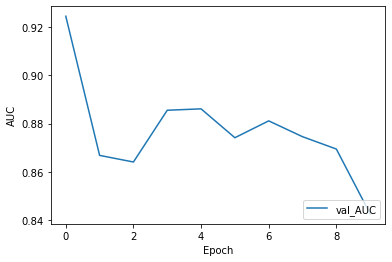

In [14]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

model.evaluate(test_images,  test_labels, verbose=2)


In [15]:
for i in range(3):
    model.layers[i].trainable = False

# Transfert du modèle sur le patient 10

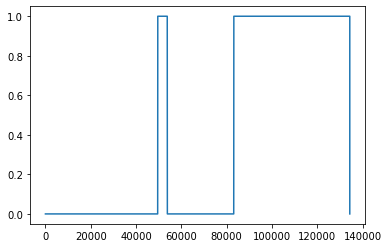

In [16]:
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(10)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(10)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [17]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

4197/4197 - 15s - loss: 9.7538 - accuracy: 0.4041 - auc: 0.4004 - 15s/epoch - 4ms/step


[9.753820419311523, 0.40413758158683777, 0.4004390239715576]

In [18]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:47000],x2[70000:])),np.concatenate((y2[:47000],y2[70000:])),x2[47000:70000,:,:],y2[47000:70000]


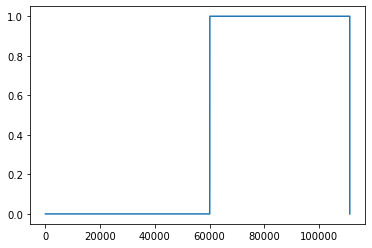

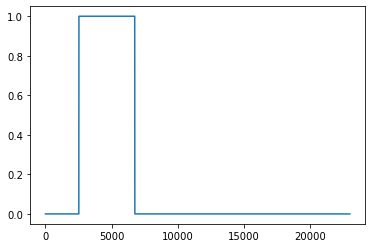

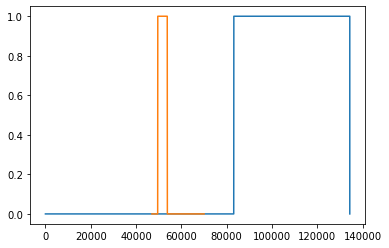

In [19]:
plt.plot(np.arange(0,len(y2_train)),y2_train)
plt.show()
plt.plot(np.arange(0,len(y2_test)),y2_test)
plt.show()
plt.plot(np.concatenate((np.arange(0,len(y2))[:47000],np.arange(0,len(y2))[70000:])),np.concatenate((y2[:47000],y2[70000:])))
plt.plot(np.arange(0,len(y2))[47000:70000],y2[47000:70000])
plt.show()

In [20]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
3478/3478 [==============================] - 19s 5ms/step - loss: 0.3251 - accuracy: 0.8826 - auc: 0.9473 - val_loss: 6.9463 - val_accuracy: 0.4193 - val_auc: 0.2655
Epoch 2/10
3478/3478 [==============================] - 18s 5ms/step - loss: 0.1719 - accuracy: 0.9398 - auc: 0.9827 - val_loss: 9.3406 - val_accuracy: 0.4214 - val_auc: 0.3234
Epoch 3/10
3478/3478 [==============================] - 18s 5ms/step - loss: 0.1468 - accuracy: 0.9485 - auc: 0.9867 - val_loss: 10.4080 - val_accuracy: 0.4222 - val_auc: 0.3497
Epoch 4/10
3478/3478 [==============================] - 19s 5ms/step - loss: 0.1344 - accuracy: 0.9540 - auc: 0.9885 - val_loss: 10.8848 - val_accuracy: 0.4217 - val_auc: 0.3557
Epoch 5/10
3478/3478 [==============================] - 19s 5ms/step - loss: 0.1304 - accuracy: 0.9558 - auc: 0.9893 - val_loss: 11.3512 - val_accuracy: 0.4210 - val_auc: 0.3425
Epoch 6/10
3478/3478 [==============================] - 18s 5ms/step - loss: 0.1252 - accuracy: 0.9578 - auc: 0.

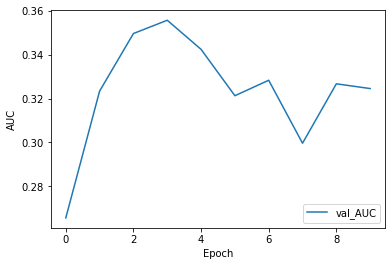

In [21]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')

plt.legend(loc='lower right')

# transfert du modele sur le patient 7

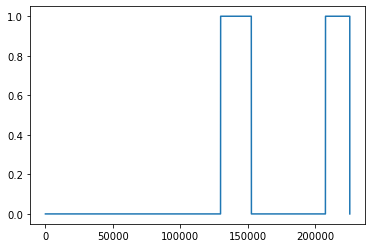

In [22]:
n_patient = 7
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [23]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2022-07-06 15:52:06.470515: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1744766280 exceeds 10% of free system memory.
2022-07-06 15:52:07.711298: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1744766280 exceeds 10% of free system memory.


7045/7045 - 26s - loss: 4.0764 - accuracy: 0.5807 - auc: 0.5763 - 26s/epoch - 4ms/step


[4.076436996459961, 0.5807019472122192, 0.5763409733772278]

In [24]:
x2_train, y2_train, x2_test, y2_test = x2[:153000],y2[:153000],x2[153000:],y2[153000:]


In [ ]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

2022-07-06 15:52:35.827818: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1184220000 exceeds 10% of free system memory.
2022-07-06 15:52:36.718835: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1184220000 exceeds 10% of free system memory.


Epoch 1/10
4782/4782 [==============================] - 32s 7ms/step - loss: 0.0515 - accuracy: 0.9844 - auc: 0.9979 - val_loss: 0.8930 - val_accuracy: 0.9271 - val_auc: 0.9407
Epoch 2/10
4782/4782 [==============================] - 31s 7ms/step - loss: 0.0353 - accuracy: 0.9892 - auc: 0.9988 - val_loss: 1.0934 - val_accuracy: 0.9187 - val_auc: 0.9345
Epoch 3/10
2138/4782 [============>.................] - ETA: 12s - loss: 0.0319 - accuracy: 0.9898 - auc: 0.9990

In [ ]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

# Transfert sur patient 22

In [ ]:
n_patient = 22
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [ ]:
model.evaluate(np.expand_dims(x2_test,-1),  to_categorical(y2_test), verbose=2)

In [ ]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:30000],x2[55000:])),np.concatenate((y2[:30000],y2[55000:])),x2[30000:55000],y2[30000:55000]


In [ ]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

In [ ]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

# transfert sur patient 16

In [ ]:
n_patient = 16
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [ ]:
model.evaluate(np.expand_dims(x2_test,-1),  to_categorical(y2_test), verbose=2)